<a href="https://colab.research.google.com/github/alexiaddiaz0907/DSC410/blob/master/DSC410_WEEK9-COMPLETED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/alexiaddiaz0907/Data-/main/Car_Insurance_Claim.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


**EDA ANALYSIS **

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [3]:
#Find the duplicates

df.duplicated().sum()

0

In [4]:
#Find null values
df.isnull().sum()


ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

<AxesSubplot:ylabel='PAST_ACCIDENTS'>

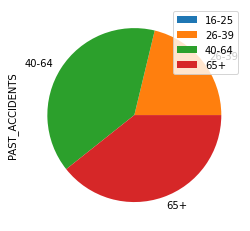

In [5]:
df.groupby(['AGE']).sum().plot(kind='pie', y='PAST_ACCIDENTS')

<AxesSubplot:ylabel='PAST_ACCIDENTS'>

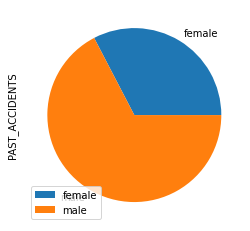

In [6]:
df.groupby(['GENDER']).sum().plot(kind='pie', y='PAST_ACCIDENTS')

<AxesSubplot:ylabel='PAST_ACCIDENTS'>

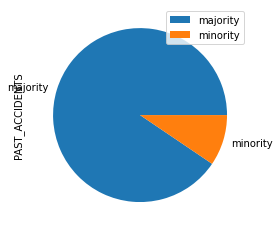

In [7]:
df.groupby(['RACE']).sum().plot(kind='pie', y='PAST_ACCIDENTS')

<AxesSubplot:ylabel='PAST_ACCIDENTS'>

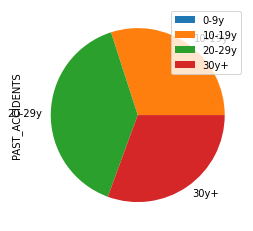

In [8]:
df.groupby(['DRIVING_EXPERIENCE']).sum().plot(kind='pie', y='PAST_ACCIDENTS')

<AxesSubplot:ylabel='PAST_ACCIDENTS'>

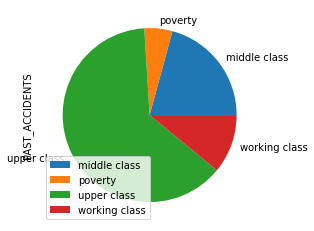

In [9]:
df.groupby(['INCOME']).sum().plot(kind='pie', y='PAST_ACCIDENTS')

<AxesSubplot:ylabel='PAST_ACCIDENTS'>

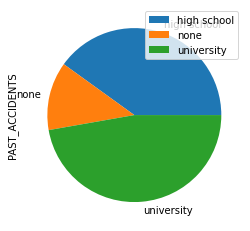

In [10]:
df.groupby(['EDUCATION']).sum().plot(kind='pie', y='PAST_ACCIDENTS')

In [11]:
#unique values

df['DRIVING_EXPERIENCE'].unique()


array(['0-9y', '10-19y', '20-29y', '30y+'], dtype=object)

In [12]:
df['CREDIT_SCORE'].unique()

array([0.62902731, 0.35775712, 0.49314579, ..., 0.47094023, 0.36418478,
       0.43522478])

In [13]:
df['AGE'].unique()

array(['65+', '16-25', '26-39', '40-64'], dtype=object)

In [14]:
df['EDUCATION'].unique()

array(['high school', 'none', 'university'], dtype=object)

In [15]:
df['INCOME'].unique()

array(['upper class', 'poverty', 'working class', 'middle class'],
      dtype=object)

In [16]:
df['VEHICLE_YEAR'].unique()

array(['after 2015', 'before 2015'], dtype=object)

In [17]:
df['VEHICLE_TYPE'].unique()

array(['sedan', 'sports car'], dtype=object)

In [18]:
df['RACE'].unique()

array(['majority', 'minority'], dtype=object)

In [19]:
df['POSTAL_CODE'].unique()

array([10238, 32765, 92101, 21217])

In [20]:
df['PAST_ACCIDENTS'].unique()

array([ 0,  1,  3,  7,  2,  5,  4,  6,  8, 10, 11,  9, 12, 14, 15])

<AxesSubplot:>

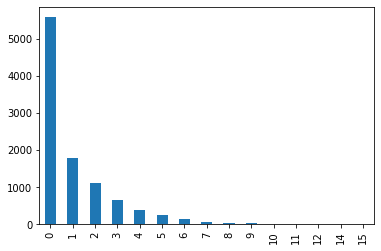

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df['PAST_ACCIDENTS'].value_counts().plot(ax=ax, kind='bar')

In [22]:
#created risk score

def risk_score(score):
  if score == 0:    #low risk
    return '0'
  elif score >= 1 and score <= 2:   #Moderate Risk
    return '1'
  else:
    return '2' #High Risk

df['RISK_SCORE'] = df['PAST_ACCIDENTS'].apply(risk_score)
df.head()



,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,RISK_SCORE
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0,0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0,1


In [23]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['DRIVING_EXPERIENCE']= label_encoder.fit_transform(df['DRIVING_EXPERIENCE'])
df['AGE']= label_encoder.fit_transform(df['AGE'])
df['EDUCATION']= label_encoder.fit_transform(df['EDUCATION'])
df['INCOME']= label_encoder.fit_transform(df['INCOME'])
df['VEHICLE_YEAR']= label_encoder.fit_transform(df['VEHICLE_YEAR'])
df['VEHICLE_TYPE']= label_encoder.fit_transform(df['VEHICLE_TYPE'])
df['RACE']= label_encoder.fit_transform(df['RACE'])
df['POSTAL_CODE']= label_encoder.fit_transform(df['POSTAL_CODE'])
df['GENDER']= label_encoder.fit_transform(df['GENDER'])


  


In [24]:
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,RISK_SCORE
0,569520,3,0,0,0,0,2,0.629027,1.0,0,0.0,1.0,0,12000.0,0,0,0,0,0.0,0
1,750365,0,1,0,0,1,1,0.357757,0.0,1,0.0,0.0,0,16000.0,0,0,0,0,1.0,0
2,199901,0,0,0,0,0,3,0.493146,1.0,1,0.0,0.0,0,11000.0,0,0,0,0,0.0,0
3,478866,0,1,0,0,2,3,0.206013,1.0,1,0.0,1.0,2,11000.0,0,0,0,0,0.0,0
4,731664,1,1,0,1,1,3,0.388366,1.0,1,0.0,0.0,2,12000.0,0,2,0,1,1.0,1


In [25]:
df.describe()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,1.489500,0.499000,0.098800,1.069300,0.97710,1.562200,0.515813,0.697000,0.696700,0.498200,0.688800,0.648400,11697.003207,0.047700,1.482900,0.23920,1.056300,0.313300
std,290030.768758,1.025278,0.500024,0.298408,0.990452,0.89892,1.008084,0.137688,0.459578,0.459707,0.500022,0.463008,1.004828,2818.434528,0.213141,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.053358,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.417191,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,1.000000,0.000000,0.000000,1.000000,1.00000,2.000000,0.525033,1.000000,1.000000,0.000000,1.000000,0.000000,12000.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,2.000000,1.000000,0.000000,2.000000,2.00000,2.000000,0.618312,1.000000,1.000000,1.000000,1.000000,2.000000,14000.000000,0.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,3.000000,1.000000,1.000000,3.000000,2.00000,3.000000,0.960819,1.000000,1.000000,1.000000,1.000000,3.000000,22000.000000,1.000000,22.000000,6.00000,15.000000,1.000000


In [26]:
#Finding the mean of the column having NaN
mean_value=df['CREDIT_SCORE'].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
df['CREDIT_SCORE'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
print(df)

Updated Dataframe:
          ID  AGE  GENDER  RACE  DRIVING_EXPERIENCE  EDUCATION  INCOME  \
0     569520    3       0     0                   0          0       2   
1     750365    0       1     0                   0          1       1   
2     199901    0       0     0                   0          0       3   
3     478866    0       1     0                   0          2       3   
4     731664    1       1     0                   1          1       3   
...      ...  ...     ...   ...                 ...        ...     ...   
9995  323164    1       0     0                   1          2       2   
9996  910346    1       0     0                   1          1       0   
9997  468409    1       1     0                   0          0       0   
9998  903459    1       0     0                   1          0       1   
9999  442696    1       0     0                   0          1       3   

      CREDIT_SCORE  VEHICLE_OWNERSHIP  VEHICLE_YEAR  MARRIED  CHILDREN  \
0         0.629027

In [27]:
#Finding the mean of the column having NaN
mean_value=df['ANNUAL_MILEAGE'].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
df['ANNUAL_MILEAGE'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
print(df)

Updated Dataframe:
          ID  AGE  GENDER  RACE  DRIVING_EXPERIENCE  EDUCATION  INCOME  \
0     569520    3       0     0                   0          0       2   
1     750365    0       1     0                   0          1       1   
2     199901    0       0     0                   0          0       3   
3     478866    0       1     0                   0          2       3   
4     731664    1       1     0                   1          1       3   
...      ...  ...     ...   ...                 ...        ...     ...   
9995  323164    1       0     0                   1          2       2   
9996  910346    1       0     0                   1          1       0   
9997  468409    1       1     0                   0          0       0   
9998  903459    1       0     0                   1          0       1   
9999  442696    1       0     0                   0          1       3   

      CREDIT_SCORE  VEHICLE_OWNERSHIP  VEHICLE_YEAR  MARRIED  CHILDREN  \
0         0.629027

In [28]:
#check for missing values again

#Find null values
df.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
RISK_SCORE             0
dtype: int64

In [29]:
#Correlation 
df.corr()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000000,0.013512,-0.007343,-0.005973,0.004298,-0.008880,-0.006655,0.001621,0.009197,0.003281,0.014826,0.001233,0.007275,-0.002111,0.006243,0.008156,0.009268,0.001831,-0.010506
AGE,0.013512,1.000000,0.005929,-0.011645,0.707393,0.153339,0.145340,0.471419,0.272140,-0.235390,0.384759,0.383708,0.008454,-0.263838,-0.008463,0.458413,0.281937,0.431061,-0.448463
GENDER,-0.007343,0.005929,1.000000,-0.006711,0.007511,0.082831,0.012226,-0.077478,0.007385,-0.010674,0.008393,-0.002640,-0.002093,-0.015068,-0.000022,0.202095,0.094202,0.223202,0.107208
RACE,-0.005973,-0.011645,-0.006711,1.000000,-0.020461,-0.041897,-0.000151,-0.037637,-0.034738,0.020895,-0.021597,0.007575,0.007465,-0.001898,0.006089,-0.014068,-0.015296,-0.008848,0.008280
DRIVING_EXPERIENCE,0.004298,0.707393,0.007511,-0.020461,1.000000,0.094116,0.086181,0.327672,0.202788,-0.164915,0.269942,0.277546,0.006297,-0.178353,-0.008554,0.637306,0.399398,0.604699,-0.497431
EDUCATION,-0.008880,0.153339,0.082831,-0.041897,0.094116,1.000000,0.079765,0.202505,0.121432,-0.113857,0.105263,0.074666,0.013008,-0.076280,0.000482,0.081562,0.056286,0.067320,-0.092643
INCOME,-0.006655,0.145340,0.012226,-0.000151,0.086181,0.079765,1.000000,0.087576,0.046080,-0.071399,0.060935,0.047046,0.019519,-0.050977,-0.012181,0.061603,0.051878,0.050460,-0.047560
CREDIT_SCORE,0.001621,0.471419,-0.077478,-0.037637,0.327672,0.202505,0.087576,1.000000,0.295689,-0.254574,0.267074,0.209515,0.004112,-0.157641,-0.013141,0.194645,0.120953,0.172077,-0.309010
VEHICLE_OWNERSHIP,0.009197,0.272140,0.007385,-0.034738,0.202788,0.121432,0.046080,0.295689,1.000000,-0.158579,0.175626,0.125990,-0.002241,-0.092701,0.005647,0.133868,0.086567,0.119521,-0.378921
VEHICLE_YEAR,0.003281,-0.235390,-0.010674,0.020895,-0.164915,-0.113857,-0.071399,-0.254574,-0.158579,1.000000,-0.129638,-0.105189,0.000562,0.073713,0.025185,-0.102700,-0.049981,-0.097587,0.294178


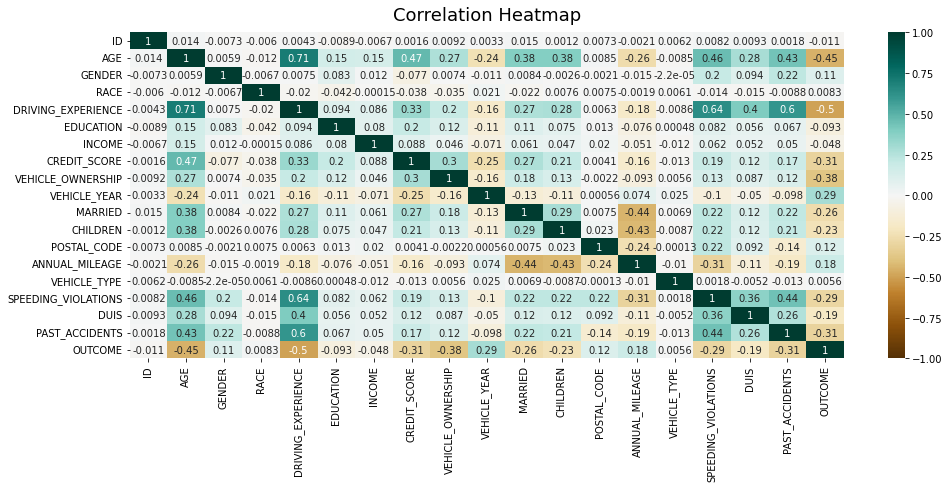

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [31]:
df.drop(['OUTCOME', 'ID' ], axis = 1)

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,RISK_SCORE
0,3,0,0,0,0,2,0.629027,1.0,0,0.0,1.0,0,12000.000000,0,0,0,0,0
1,0,1,0,0,1,1,0.357757,0.0,1,0.0,0.0,0,16000.000000,0,0,0,0,0
2,0,0,0,0,0,3,0.493146,1.0,1,0.0,0.0,0,11000.000000,0,0,0,0,0
3,0,1,0,0,2,3,0.206013,1.0,1,0.0,1.0,2,11000.000000,0,0,0,0,0
4,1,1,0,1,1,3,0.388366,1.0,1,0.0,0.0,2,12000.000000,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,1,2,2,0.582787,1.0,1,0.0,0.0,0,16000.000000,0,0,0,1,1
9996,1,0,0,1,1,0,0.522231,1.0,0,0.0,1.0,2,11697.003207,0,1,0,0,0
9997,1,1,0,0,0,0,0.470940,1.0,1,0.0,1.0,0,14000.000000,0,0,0,0,0
9998,1,0,0,1,0,1,0.364185,0.0,1,0.0,1.0,0,13000.000000,0,2,0,1,1


In [32]:
#df.info()

df['RISK_SCORE'] = df['RISK_SCORE'].astype(str).astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  int64  
 2   GENDER               10000 non-null  int64  
 3   RACE                 10000 non-null  int64  
 4   DRIVING_EXPERIENCE   10000 non-null  int64  
 5   EDUCATION            10000 non-null  int64  
 6   INCOME               10000 non-null  int64  
 7   CREDIT_SCORE         10000 non-null  float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  int64  
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       10000 non-null  float64
 14  VEHICLE_TYPE         10000 non-null  int64  
 15  SPEEDING_VIOLATIONS  10000 non-null  

# **K-NN Hyperparameter tuning**


In [34]:
#split dataset in features and target variable
feature_cols = ['AGE', 'GENDER', 'DRIVING_EXPERIENCE','MARRIED','CHILDREN','SPEEDING_VIOLATIONS', 'POSTAL_CODE','DUIS','CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'PAST_ACCIDENTS']
X = df[feature_cols] # Features
y = df.RISK_SCORE # Target variable

#print(df[feature_cols])
print(df.RISK_SCORE)

0       0
1       0
2       0
3       0
4       1
       ..
9995    1
9996    0
9997    0
9998    1
9999    0
Name: RISK_SCORE, Length: 10000, dtype: int64


In [35]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8)



In [36]:
# Feature Scaling
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
#Obtain the pairs candiate value and metric value 

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=13)

candidates = np.arange(4,16)
mae_metrics = []
for k in candidates:
    model = KNeighborsRegressor(n_neighbors=k, weights='distance', metric='minkowski', leaf_size=50, n_jobs=4)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    metric = mean_absolute_error(y_true=y_val, y_pred=y_pred)
    mae_metrics.append(metric)

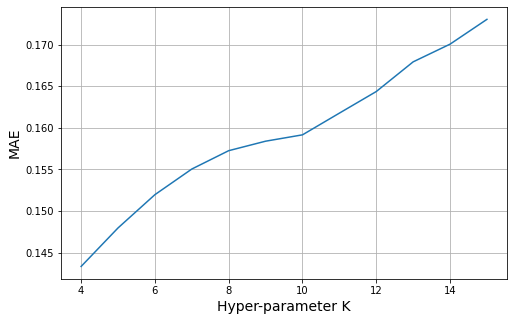

In [38]:
#Visualize MAE associated with each K value
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(candidates, mae_metrics)
ax.set_xlabel('Hyper-parameter K', fontsize=14)
ax.set_ylabel('MAE', fontsize=14)
ax.grid();

In [39]:
# Feature Scaling
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
#Use 10-fold cross-validation to get the metrics
from sklearn.model_selection import cross_val_score
candidates = np.arange(4,16)
mean_mae = []
std_mae = []
for k in candidates:
    model = KNeighborsRegressor(n_neighbors=k, weights='distance', metric='minkowski', leaf_size=50, n_jobs=4)
    cv_results = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
    mean_score, std_score = -1*cv_results.mean(), cv_results.std()
    mean_mae.append(mean_score)
    std_mae.append(std_score)

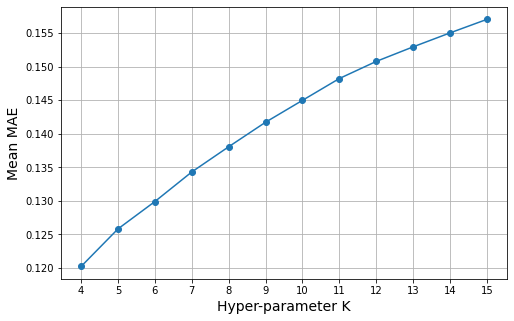

In [41]:
#Visualize cross-validated MAE
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(candidates, mean_mae, "o-")
ax.set_xlabel('Hyper-parameter K', fontsize=14)
ax.set_ylabel('Mean MAE', fontsize=14)
ax.set_xticks(candidates)
ax.grid();

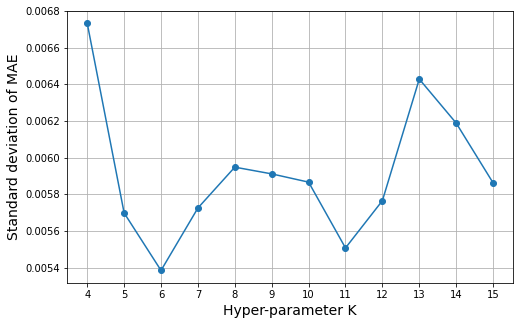

In [42]:
#the standard deviation of each of the 10 MAE estimations
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(candidates, std_mae, "o-")
ax.set_xlabel('Hyper-parameter K', fontsize=14)
ax.set_ylabel('Standard deviation of MAE', fontsize=14)
ax.set_xticks(candidates)
ax.grid();

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [44]:
from sklearn import metrics

In [45]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.91 , 0.898, 0.905, 0.887, 0.901, 0.891, 0.893, 0.893, 0.884,
       0.883, 0.88 , 0.883, 0.882, 0.883, 0.874, 0.876, 0.874, 0.878,
       0.875, 0.873])

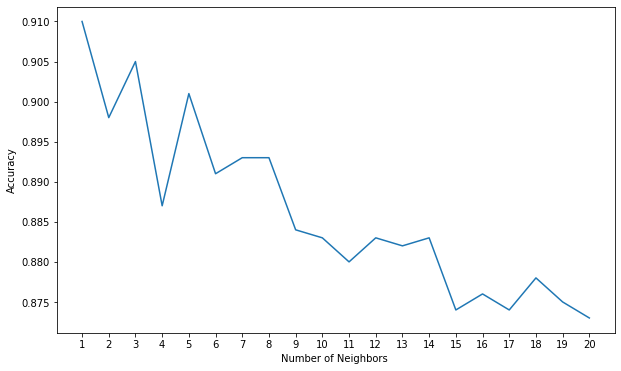

In [46]:
#Visualize ACCURACY AGAINST NUMBER OF NEIGHBORS 
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
grid_params = { 'n_neighbors' : [4],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [49]:
from sklearn.neighbors import KNeighborsClassifier
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [50]:
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [51]:
# find the best score
g_res.best_score_

0.9328888888888889

In [52]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

In [53]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 13, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='brute', n_neighbors=13)

In [54]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

# **K-NN Model Eval**

In [55]:
# Use score method to get accuracy of model
from sklearn.metrics import accuracy_score
print('Training set accuracy:', accuracy_score(y_train, y_hat))
print('Test set accuracy: ',accuracy_score(y_test, y_knn))



Training set accuracy: 0.9076666666666666
Test set accuracy:  0.882


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       568
           1       0.76      0.86      0.81       290
           2       0.96      0.75      0.84       142

    accuracy                           0.88      1000
   macro avg       0.89      0.85      0.86      1000
weighted avg       0.89      0.88      0.88      1000



In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv =13)

In [58]:
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.9891012758372967


In [59]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_knn))

[[525  42   1]
 [ 36 250   4]
 [  0  35 107]]


# **Logstic Regression Model **

In [60]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8)

In [61]:
# Feature Scaling
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
print(y_pred)

[2 1 1 ... 0 0 1]


In [64]:
# find accuracy, precision, recall:

from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(y_pred,y_test)

array([[1127,    0,    0],
       [   0,  571,    0],
       [   0,    0,  302]])

In [65]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1127
           1       1.00      1.00      1.00       571
           2       1.00      1.00      1.00       302

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [66]:
# Use score method to get accuracy of model
from sklearn.metrics import accuracy_score
print('The accuracy of the Logistic Regression is', accuracy_score(y_pred,y_test))

The accuracy of the Logistic Regression is 1.0


# **MultinomialNB MODEL
**

In [336]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [337]:
nb_predict=nb.predict(X_test)

In [338]:
nb_report = accuracy_score(y_test,nb_predict)
print('Accuracy:',nb_report)

Accuracy: 0.8985


In [339]:
print(classification_report(y_test,nb_predict))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1127
           1       0.75      0.98      0.85       571
           2       0.95      0.71      0.81       302

    accuracy                           0.90      2000
   macro avg       0.90      0.86      0.87      2000
weighted avg       0.92      0.90      0.90      2000

